In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('titanic_toy.csv')

In [4]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [6]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [7]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [10]:
X_train.isnull().mean()

Age       0.193820
Fare      0.049157
Family    0.000000
dtype: float64

In [11]:
mean_age = X_train['Age'].mean()
meadian_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
meadian_fare = X_train['Fare'].median()

In [12]:
X_train['Age_median'] = X_train['Age'].fillna(meadian_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(meadian_age)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_age)

In [13]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
200,28.0,9.5000,0,28.0,28.000000,9.5000,9.5000
527,NaN,221.7792,0,28.0,29.494199,221.7792,221.7792
343,25.0,13.0000,0,25.0,25.000000,13.0000,13.0000
640,20.0,7.8542,0,20.0,20.000000,7.8542,7.8542
783,NaN,23.4500,3,28.0,29.494199,23.4500,23.4500


In [14]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  210.04655354512894
Age Variance after median imputation:  169.62737198576937
Age Variance after mean imputation:  169.2780241650617
Original Fare variable variance:  2239.7767716441963
Fare Variance after median imputation:  2130.068984337167
Fare Variance after mean imputation:  2129.6946778341103


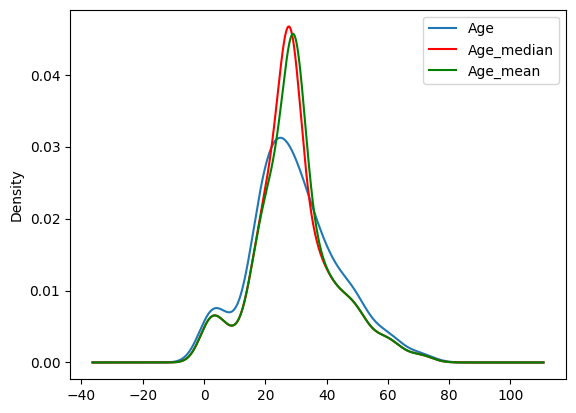

In [15]:
fig =  plt.figure()
ax = fig.add_subplot(111)

X_train['Age'].plot(kind = 'kde', ax=ax)

X_train['Age_median'].plot(kind = 'kde', ax=ax, color = 'red')

X_train['Age_mean'].plot(kind = 'kde', ax=ax, color = 'green')

lines, labels = ax.get_legend_handles_labels()

ax.legend(lines, labels, loc = 'best')

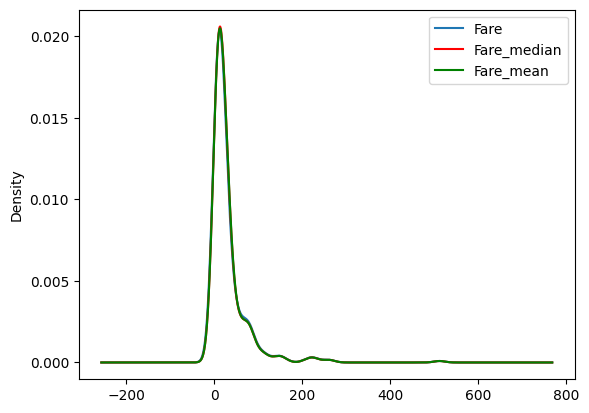

In [16]:
fig =  plt.figure()
ax = fig.add_subplot(111)

X_train['Fare'].plot(kind = 'kde', ax=ax)

X_train['Fare_median'].plot(kind = 'kde', ax=ax, color = 'red')

X_train['Fare_mean'].plot(kind = 'kde', ax=ax, color = 'green')

lines, labels = ax.get_legend_handles_labels()

ax.legend(lines, labels, loc = 'best')

In [17]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,210.046554,78.089384,-6.328307,210.046554,210.046554,73.951834,73.926226
Fare,78.089384,2239.776772,13.927443,64.631298,62.634298,2239.776772,2239.776772
Family,-6.328307,13.927443,2.529267,-5.079733,-5.100028,13.238775,13.240115
Age_median,210.046554,64.631298,-5.079733,169.627372,169.278024,61.476982,61.465086
Age_mean,210.046554,62.634298,-5.100028,169.278024,169.278024,59.598313,59.577676
Fare_median,73.951834,2239.776772,13.238775,61.476982,59.598313,2130.068984,2129.829580
Fare_mean,73.926226,2239.776772,13.240115,61.465086,59.577676,2129.829580,2129.694678


In [18]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.107940,-0.306406,1.000000,1.000000,0.105494,0.105472
Fare,0.107940,1.000000,0.183347,0.104703,0.101576,1.000000,1.000000
Family,-0.306406,0.183347,1.000000,-0.245242,-0.246476,0.180366,0.180400
Age_median,1.000000,0.104703,-0.245242,1.000000,0.998970,0.102275,0.102264
Age_mean,1.000000,0.101576,-0.246476,0.998970,1.000000,0.099251,0.099226
Fare_median,0.105494,1.000000,0.180366,0.102275,0.099251,1.000000,0.999975
Fare_mean,0.105472,1.000000,0.180400,0.102264,0.099226,0.999975,1.000000


<Axes: >

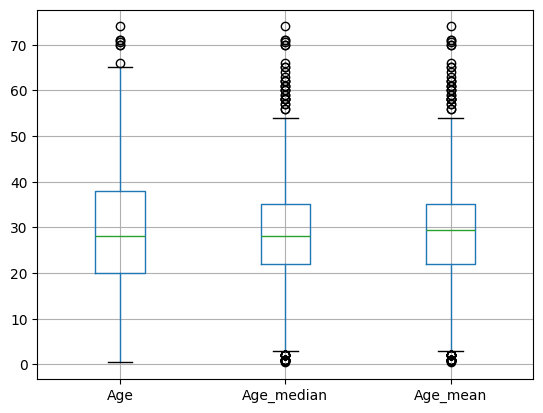

In [19]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()

<Axes: >

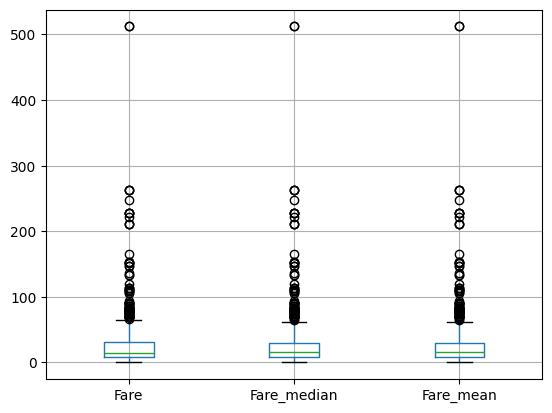

In [20]:
X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [23]:
trf = ColumnTransformer([
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Fare'])
], remainder='passthrough')

In [24]:
trf.fit(X_train)

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [28]:
trf.named_transformers_['imputer1'].statistics_

array([29.])

In [29]:
trf.named_transformers_['imputer2'].statistics_

array([31.9690315])

In [30]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [31]:
X_train

array([[ 26.       ,   7.8542   ,   0.       ],
       [ 15.       , 211.3375   ,   1.       ],
       [ 29.       ,  31.9690315,   0.       ],
       ...,
       [ 44.       ,  26.       ,   1.       ],
       [ 10.       ,  24.15     ,   2.       ],
       [ 29.       ,  24.15     ,   1.       ]])